In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
import math
import re
from textblob import TextBlob
from wordcloud import WordCloud

In [2]:
data = pd.read_csv("Dataset/Yelp Review.csv")

In [4]:
def preprocess(x):
    x = re.sub('[^a-z\s]', '', x.lower())                  
    x = [w for w in x.split() if w not in stopwords.words('english')]  
    return ' '.join(x)

data['text_processed'] = data['text'].apply(preprocess)

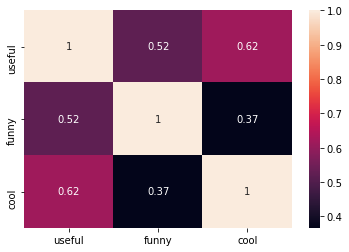

In [5]:
stars = data.groupby('stars').mean()
stars.corr()
sns.heatmap(data=stars.corr(), annot=True)

In [6]:
data1 = data[data['stars']==1]['text_processed']
data2 = data[data['stars']==2]['text_processed']
data3 = data[data['stars']==3]['text_processed']
data4 = data[data['stars']==4]['text_processed']
data5 = data[data['stars']==5]['text_processed']

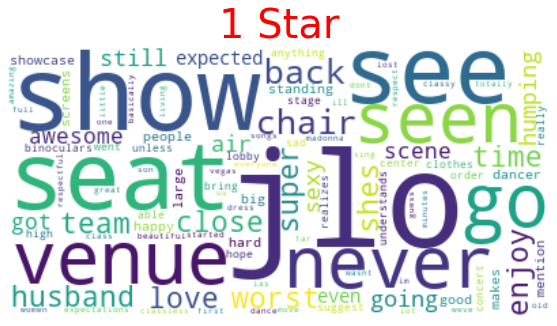

In [7]:
text_pos = " ".join(str(i) for i in data1)

# Create a word cloud image
wc_pos = WordCloud(background_color="white", max_words=100, contour_width=10, contour_color='firebrick')

# Generate a wordcloud
wc_pos.generate(text_pos)

plt.figure(figsize=(10,5))
plt.title("1 Star", fontsize=40,color='Red')
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis("off")
plt.show()

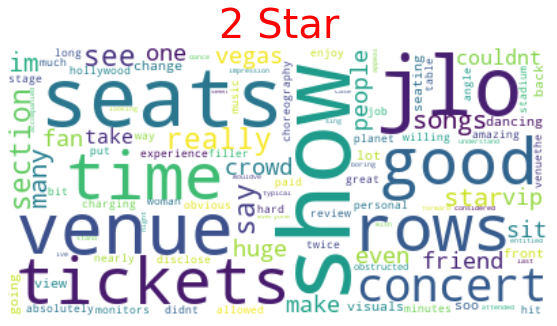

In [8]:
text_pos = " ".join(str(i) for i in data2)

# Create a word cloud image
wc_pos = WordCloud(background_color="white", max_words=100, contour_width=10, contour_color='firebrick')

# Generate a wordcloud
wc_pos.generate(text_pos)

plt.figure(figsize=(10,5))
plt.title("2 Star", fontsize=40,color='Red')
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis("off")
plt.show()

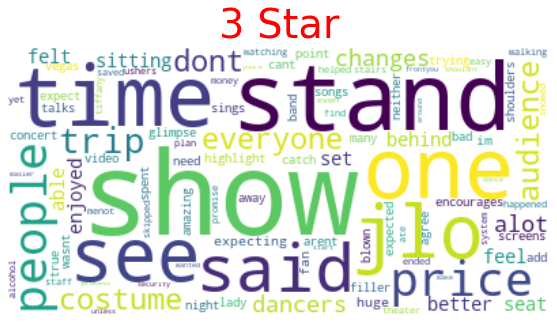

In [9]:
text_pos = " ".join(str(i) for i in data3)

# Create a word cloud image
wc_pos = WordCloud(background_color="white", max_words=100, contour_width=10, contour_color='firebrick')

# Generate a wordcloud
wc_pos.generate(text_pos)

plt.figure(figsize=(10,5))
plt.title("3 Star", fontsize=40,color='Red')
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis("off")
plt.show()


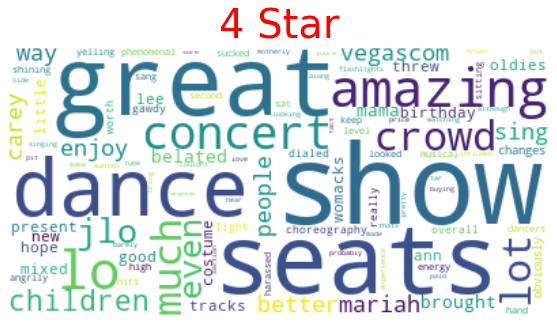

In [10]:
text_pos = " ".join(str(i) for i in data4)

# Create a word cloud image
wc_pos = WordCloud(background_color="white", max_words=100, contour_width=10, contour_color='firebrick')

# Generate a wordcloud
wc_pos.generate(text_pos)

plt.figure(figsize=(10,5))
plt.title("4 Star", fontsize=40,color='Red')
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis("off")
plt.show()

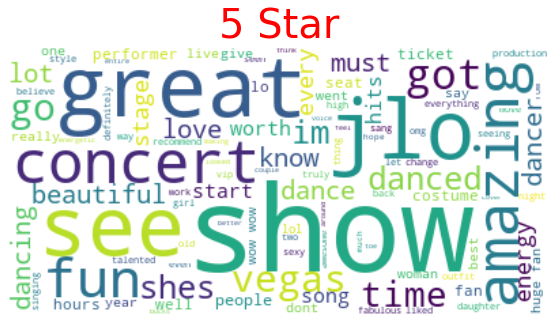

In [11]:
text_pos = " ".join(str(i) for i in data5)

# Create a word cloud image
wc_pos = WordCloud(background_color="white", max_words=100, contour_width=10, contour_color='firebrick')

# Generate a wordcloud
wc_pos.generate(text_pos)

plt.figure(figsize=(10,5))
plt.title("5 Star", fontsize=40,color='Red')
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis("off")
plt.show()

In [12]:
def sentiment(x):
    sentiment = TextBlob(x)
    return sentiment.sentiment.polarity

In [13]:
data['review_sentiment'] = data['text_processed'].apply(sentiment)


In [14]:
data[['review_sentiment','stars','text_processed']]

,review_sentiment,stars,text_processed
0,0.422348,5,expecting concert much fun womans got energy d...
1,0.195351,4,brought mama belated birthday present good sho...
2,0.089583,2,attended show last night impression would conc...
3,0.366531,5,husband got us tickets could believe course to...
4,0.267778,4,j lo phenomenal great show sang hits looked am...
5,0.370536,5,im actually huge fan jlo recent songs love old...
6,0.160714,5,last minute decision see show purchased ticket...
7,0.253022,1,happy could see seats mention people standing ...
8,0.464286,5,simple come las vegas must attend show perfect...
9,-0.087037,5,amazing tell put alot hard work show really go...


In [15]:
data.iloc[9]['text_processed']

'amazing tell put alot hard work show really goodtime majority fans kinda sad see bunch stuffy people sitting participating looking bored could u get want dancedont know even bothered go maybe thought going taping american idoland cheapest seats including service fees fan musicdont waste money let real fans appreciate music dancing buy tickets let jlo know appreciate hard work'

In [16]:
data.iloc[9]['text']

"AMAZING!!! you can tell she put in alot if hard work for this show. We had a really goodtime and so did the majority of fans!!! It was kinda sad to see a bunch of stuffy people there just sitting there not participating and looking bored. How could u not get up and want to dance?Don't know why they even bothered to go...  maybe they thought they were going to a taping of American idol?and cheapest seats were $139 not including service fees? If you are not a fan of her music...don't waste your money and let the real fans who appreciate the music and dancing buy the tickets and let JLo know that they appreciate her hard work!"

In [17]:
data['sentiment'] = ''
data['sentiment'][(data['review_sentiment'] >= 0.2)] = 'Positive'
data['sentiment'][(data['review_sentiment'] >= 0) &(data['review_sentiment'] < 0.2)] = 'Neutral'
data['sentiment'][(data['review_sentiment'] < 0)] = 'Negative'

<ipython-input-17-8697885195ab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment'][(data['review_sentiment'] >= 0.2)] = 'Positive'
<ipython-input-17-8697885195ab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment'][(data['review_sentiment'] >= 0) &(data['review_sentiment'] < 0.2)] = 'Neutral'
<ipython-input-17-8697885195ab>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment'][(data['review_s

In [18]:
data[['stars', 'sentiment', 'text']]

,stars,sentiment,text
0,5,Positive,I was not expecting this concert to be as much...
1,4,Neutral,brought mama for a belated birthday present. v...
2,2,Neutral,I attended this show last night and was under ...
3,5,Positive,My husband got us tickets and I could not beli...
4,4,Positive,J. Lo was phenomenal!! Such a great show! She ...
5,5,Positive,I'm not actually a huge fan of jlo' recent son...
6,5,Neutral,It was a last minute decision to see this show...
7,1,Positive,Not happy. We could not see from our seats not...
8,5,Positive,"Simple, if you come to las vegas , you MUST a..."
9,5,Negative,AMAZING!!! you can tell she put in alot if har...


In [19]:
data.iloc[9]['sentiment']

'Negative'